In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pickle 

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dados_iniciais = pd.read_csv('desafio.csv')
dados_iniciais.head()
# Mostra os primeiros 5 títulos. Ajuda a saber o que é antes de tudo. 

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Unnamed: 16
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,NaN
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,NaN
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,NaN
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,NaN
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,NaN


In [3]:
dados_iniciais.info() #Resumo dos Dados/Valores que faltam - Se aplicável.
# Mostra colunas, tamanho dos dados e tipo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    object 
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    object 
 15  Gross          830 non-null    float64
 16  Unnamed: 16    2 non-null      object 
dtypes: float64(2), int64(1), object(14)
memory usage: 132.

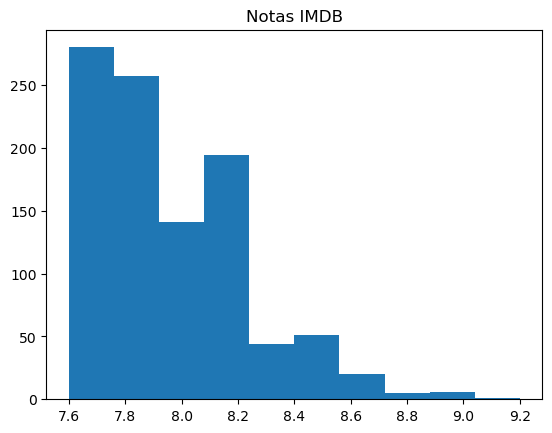

In [4]:
plt.hist(dados_iniciais['IMDB_Rating']) #matplotlib, histograma
plt.title('Notas IMDB')
plt.show() 
#Poucos filmes receberam nota 9.0. O gráfico funciona bem!

In [4]:
corlç = dados_iniciais['IMDB_Rating'].corr(dados_iniciais['Gross']) #mostra correlação da nota do IMDB + renda (erro: Não foi possível converter string para float -> Corrigido)

dados_iniciais['No_of_Votes'] = pd.to_numeric(dados_iniciais['No_of_Votes'], errors ='coerce') #No_of_Votes object -> float64
dados_iniciais.dropna(subset=['No_of_Votes'], inplace=True) 
corlç = dados_iniciais['Gross'].corr(dados_iniciais['No_of_Votes']) 

print(corlç) # A correlação não alcançou o valor máximo, porém: em observação da planilha, é possível chegar a conclusão de que filmes com maior revenue obtiveram maior número de votos. Proporcionalmente, A correlação entre 'Gross' e 'No_of_Votes' tende a ser positiva.


0.5892531468764014


In [6]:
recomendações = dados_iniciais.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=False).head(1) #separar colunas importantes para a escolha. Nesse caso, a nota do IMDB e o número de votos recebidos.
print (recomendações[['Series_Title', 'IMDB_Rating', 'No_of_Votes']])

    Series_Title  IMDB_Rating  No_of_Votes
0  The Godfather          9.2    1620367.0


In [5]:
dados_iniciais['Runtime']= dados_iniciais['Runtime'].str.replace(' min', '').str.strip()
dados_iniciais['Runtime']= pd.to_numeric(dados_iniciais['Runtime'], errors = 'coerce') #Conversão de tipos
dados_iniciais.dropna(subset=['Gross'], inplace=True)
crlç_tempo_revenue = dados_iniciais['Runtime'].corr(dados_iniciais['Gross']) #Cálculo de correlação com outras colunas
print(crlç_tempo_revenue)
#O resultado mostrou baixa correlação entre tempo e revenue. Mesmo que filmes mais longos possam ter uma possibilidade maior de renda, não um fator principal para expectativa.

0.13943821480221655


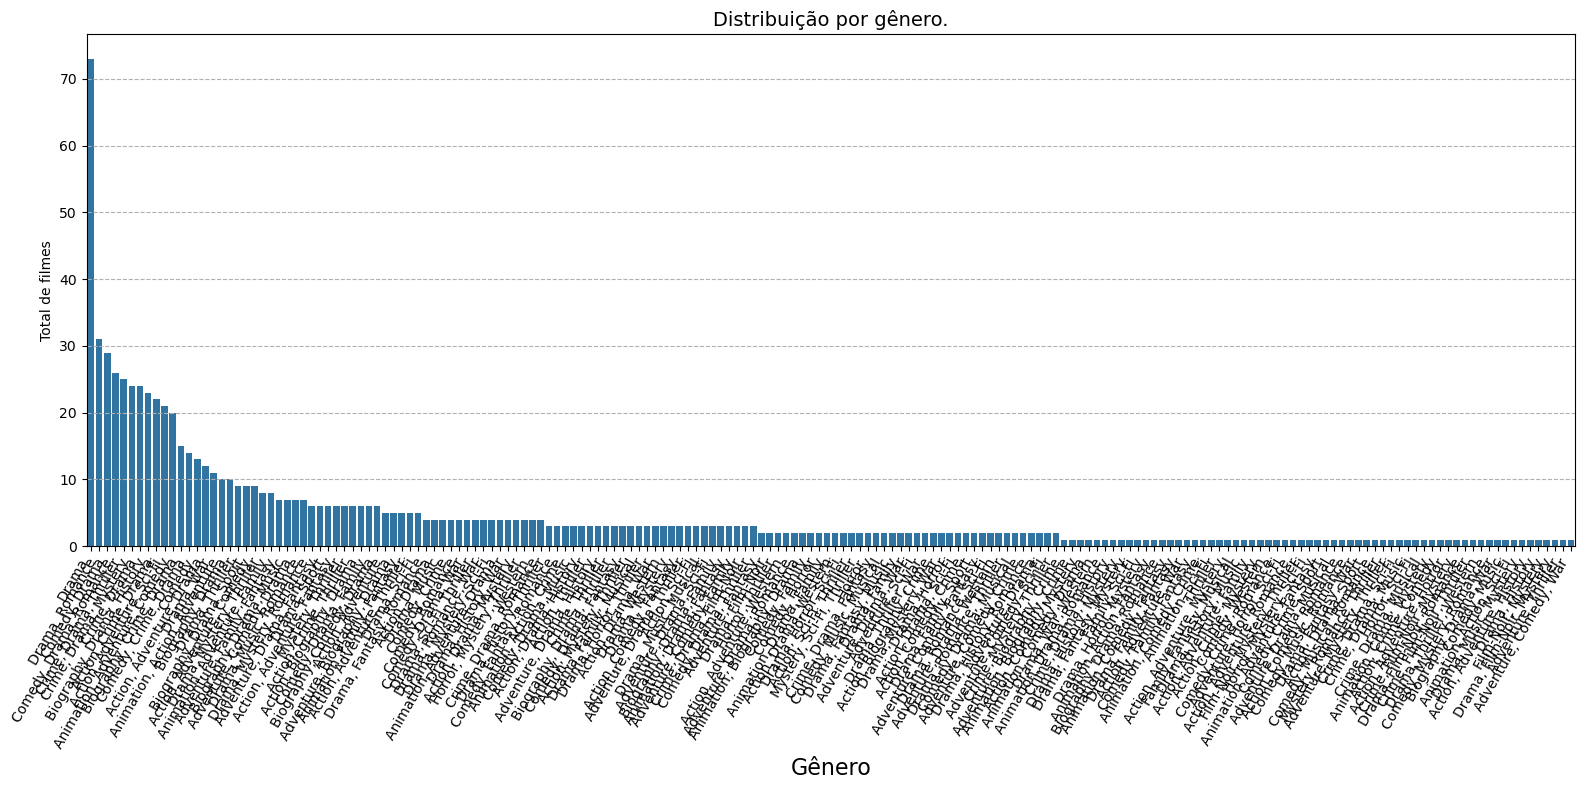

In [18]:
gnr = dados_iniciais['Genre'].value_counts() #Responde: Quantos gêneros há?

Gnr_S = []
for lista_todos in dados_iniciais['Genre']:
    for genre in lista_todos.split(', '):
        Gnr_S.append(genre.strip())

cont_individual = pd.Series(lista_todos).value_counts()


plt.figure(figsize=(16, 8))
sns.barplot(x=gnr.index, y=gnr.values)
plt.title('Distribuição por gênero.', fontsize = 14)
plt.xlabel('Gênero', fontsize = 16)
plt.ylabel('Total de filmes')
plt.xticks(rotation=60, ha='right', fontsize = 10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


In [14]:
X = dados_iniciais[['Meta_score', 'Gross', 'No_of_Votes', 'IMDB_Rating']] #Colunas que vão treinar o modelo = crítica, revenue e número de votos. 
y = dados_iniciais[['IMDB_Rating']]

data_limpeza = pd.concat([X, y], axis=1) 
data_limpeza.dropna(inplace=True) 

X = data_limpeza[['Gross', 'No_of_Votes', 'Meta_score']]
y = data_limpeza['IMDB_Rating']

X_treino, X_test, y_treino, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo1 = LinearRegression()
modelo1.fit(X_treino, y_treino)


previsão1 = modelo1.predict(X_test)

mse = mean_squared_error(y_test, previsão1) #"Mean Squared Error - métrica que avalia qualidade/precisão desses modelos.
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.03963108270398219


In [21]:
with open('LH_CD_LorenaMelo.pkl', 'wb') as file:
    pickle.dump(modelo1, file)